# 主成分分析(Principal Component Analysis, PCA)

## 符号定义

|符号|含义|
|:-:|:-:|
|$X$|样本集合|
|$\bm{x}$|数据点|
|$d$|数据点维度|
|$k$|降维后维度|
|$\hat{\bm{x}}$|降维后数据点|
|$\bm{y}$|降维后在k维子空间的坐标|

## 维度、内在维度与降维

对于一个多维的数据点$\bm{x}\in \mathcal{R}^d$，若需要$d$个值来确切定义这一数据点，则其内在维度(inherent dimensionality)与其自然维度相同。

但是在实际数据中，往往不同维度的数据间有一定的关系，即对于一个多维的数据点 $ \bm{x}\in \mathcal{R}^d $ ，往往仅需要 $ k<d $ 个值来定义这一数据点，此时内在维度要小于自然维度。

上述分析显然是存在问题的，因为实际数据中有噪声。噪声会导致一个多维的数据点 $ \bm{x}\in \mathcal{R}^d $ 必须使用$d$个值来定义。但是噪声往往是无意义的，甚至在后续的分析中是需要被排除的，因此可以合理的认为噪声不影响内在维度的确定。

降维就是在寻找这么一个变换，将原本为$d$个维度的数据转换为$k$维。

降维显然有诸多好处：

* **降低数据对计算资源以及存储资源的需求**：这是显而易见的
* **去除噪声**：上述讨论有提到，噪声在真实数据中是不可忽视的，噪声很有可能在降维中被移除
* **凸显特征**：降维后能更好的体现原始数据在某一特定观点下的关键特征。无论是用于可视化（降至3维及以下），还是用于后续的分析均是有帮助的

## 降到零维子空间

若降维后为零维子空间，那么所有的样本均会降维到同一个点，设该点为$\bm{m}$

对于样本集合$X=\{ \bm{x_1}, \bm{x_2}, \cdots, \bm{x_n} \}$

现在即需要寻找点$\bm{m}$，使得该点在一定的条件下是样本集合$X$降维到零维子空间后的最佳点

现在定义条件为：点$\bm{m}$与样本集合中所有的数据点平均距离最小

有：

$$
\begin{equation}
    \bm{m} = \argmin\limits_{m}\frac{1}{N}\sum_{i=1}^N||\bm{x_i}-\bm{m}||^2
\end{equation}
$$

寻找上述待优化问题的极小值点

$$
\begin{equation}
    \frac{\partial{J}}{\partial{\bm{m}}} = \frac{2}{N}\sum_{i=1}^N(\bm{m}-\bm{x_i}) = 0
\end{equation}
$$

可以得到

$$
\begin{equation}
    \bm{m} = \frac{1}{N}\sum_{i=1}^N\bm{x_i}
\end{equation}
$$

即样本集合$X$在平均距离最小的条件下得到的最佳零维子空间降维结果为所有数据点的均值

## 降维到一维子空间

对于样本集合$X$中的任意数据点，其降维到一维子空间后的表示为：

$$
\begin{equation}
    \hat{\bm{x_i}} = \bm{x_{0}} + a_i\bm{w}, i = 1, 2, \cdots, n
\end{equation}
$$

其中$\bm{x_{0}}$和$\bm{w}$由降维后的一维子空间决定，$a_i$由待降维的数据点决定，显然上述结果为一条直线。其中

注意到，最佳的零维子空间表示为所有数据点的均值，因此可以合理的将$\bm{x_{0}}$设置为$\bar{\bm{x}}$

即：
$$
\begin{equation}
    \hat{\bm{x_i}} = \bar{\bm{x}} + a_i\bm{w}, i = 1, 2, \cdots, n
\end{equation}
$$

同样的，定义条件为：降维前后的平均距离最小


定义损失函数：
$$
\begin{equation}
    \begin{split}
    \mathcal{L} 
    &= \frac{1}{N}\sum_{i=1}^N||\bm{x_i} - (\bar{\bm{x}} + a_i\bm{w})||^2\\
    &= \frac{1}{N}\sum_{i=1}^N||a_i\bm{w}-(\bm{x_i}-\bar{\bm{x}})||^2\\
    &= \frac{1}{N}\sum_{i=1}^N(a_i^2||\bm{w}||^2+||\bm{x_i}-\bar{\bm{x}}||^2 - 2a_i\bm{w}^T(\bm{x_i}-\bar{\bm{x}}))
    \end{split}
\end{equation}
$$

上式分别对$a_i$和$\bm{w}$求偏导有

$$
\begin{equation}
    \frac{\partial{J}}{\partial{a_i}} = \frac{2}{N}(a_i||\bm{w}||^2-\bm{w}^T(\bm{x_i}-\bar{\bm{x}})) = 0
\end{equation}
$$

$$
\begin{equation}
    \frac{\partial{J}}{\partial{\bm{w}}} = \frac{2}{N}\sum_{i=1}^N(a_i^2\bm{w}-a_i(\bm{x_i}-\bar{\bm{x}})) = 0
\end{equation}
$$

由损失函数对$a_i$的偏导可以得到

$$
\begin{equation}
    a_i = \frac{\bm{w}^T(\bm{x_i}-\bar{\bm{x}})}{||\bm{w}||^2}
\end{equation}
$$

若$\bm{w}$为单位向量，上式显然是向量$\bm{x_i}-\bar{\bm{x}}$在$\bm{w}$上投影的带符号长度

注意到

$$
\begin{equation}
    a_i\bm{w} = \frac{\bm{w}^T(\bm{x_i}-\bar{\bm{x}})}{||\bm{w}||^2} \bm{w} = \frac{(c\bm{w})^T(\bm{x_i}-\bar{\bm{x}})}{||c\bm{w}||^2} c\bm{w},c \neq 0 \ and \ c\in \mathcal{R} 
\end{equation}
$$

即$\bm{w}$乘以任意非零常数均不会改变降维后的结果

不妨设$\bm{w} = \frac{\bm{w}}{||\bm{w}||_2}$，此时$\bm{w}$为单位向量

因此有

$$
\begin{equation}
    a_i = \bm{w}^T(\bm{x_i}-\bar{\bm{x}}) = (\bm{x_i}-\bar{\bm{x}})^T\bm{w}
\end{equation}
$$

将式-11带入到损失函数有

$$
\begin{equation}
    \mathcal{L} = \frac{1}{N}\sum_{i=1}^N(||\bm{x_i}-\bar{\bm{x}}||^2 - a_i^2)
\end{equation}
$$

显然，当$\sum_{i=1}^Na_i^2$取得最大值时损失函数有最小值，即$\min\mathcal{L}$和$\max{\sum_{i=1}^Na_i^2}$等价

又由式-8有

$$
\begin{equation}
    \begin{split}
        \frac{\sum_{i=1}^Na_i^2}{N}\bm{w} 
        &= \frac{1}{N}\sum_{i=1}^Na_i(\bm{x_i}-\bar{\bm{x}}) \\
        &= \frac{\sum_{i=1}^N(\bm{x_i}-\bar{\bm{x}})(\bm{x_i}-\bar{\bm{x}})^T\bm{w}}{N} \\
        &= Cov(X)\bm{w}
    \end{split}
\end{equation}
$$

其中$Cov(X)$为协方差矩阵

式-13成立表明$\bm{w}$是协方差矩阵$Cov(X)$的特征向量，并且$\frac{\sum_{i=1}^Na_i^2}{N}$为对应的特征值

又结合式-12可知，需要最大化$\sum_{i=1}^Na_i^2$

因此，当降维到一维子空间时，$\bm{w}$为协方差矩阵$Cov(X)$最大特征值对应的特征向量

考虑到协方差矩阵为实对称矩阵，设协方差矩阵$Cov(X)$的特征向量为$\bm{\xi_1}, \bm{\xi_2}, \cdots, \bm{\xi_d}$，其对应的特征值依次增大

因此降维到一维子空间的表示为

$$
\begin{equation}
    \hat{\bm{x_i}} = \bar{\bm{x}} + (\bm{\xi_1}^T(\bm{x_i}-\bar{\bm{x}}))\bm{\xi_1}
\end{equation}
$$

## k维子空间

同上分析，可以推测k维子空间实际上就是协方差矩阵$Cov(X)$的前k个最大特征值对应的特征向量构成的子空间

对应的k维子空间表示为

$$
\begin{equation}
    \hat{\bm{x_i}} = \bar{\bm{x}} + (\bm{\xi_1}^T(\bm{x_i}-\bar{\bm{x}}))\bm{\xi_1} + (\bm{\xi_2}^T(\bm{x_i}-\bar{\bm{x}}))\bm{\xi_2} + \cdots + (\bm{\xi_k}^T(\bm{x_i}-\bar{\bm{x}}))\bm{\xi_k}
\end{equation}
$$

可以得到在k维子空间的坐标为

$$
\begin{equation}
    \bm{y} = (\bm{\xi_1}^T(\bm{x_i}-\bar{\bm{x}}), \bm{\xi_2}^T(\bm{x_i}-\bar{\bm{x}}), \cdots, \bm{\xi_k}^T(\bm{x_i}-\bar{\bm{x}}))^T
\end{equation}
$$

In [4]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

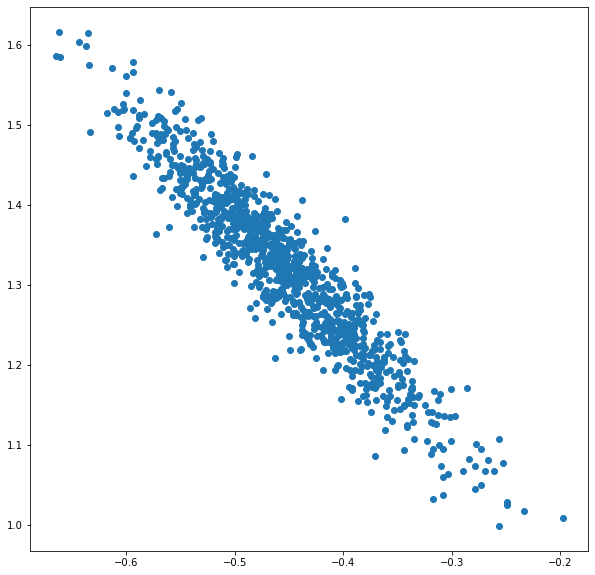

In [13]:
# 数据数量
sample_num = 1000
# 方差
std_ = 0.1

x_list, _ = make_blobs(n_samples=sample_num, centers=1, 
                            cluster_std=std_, random_state=1024, center_box=(-2, 2))

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
x_list = np.dot(x_list, transformation)

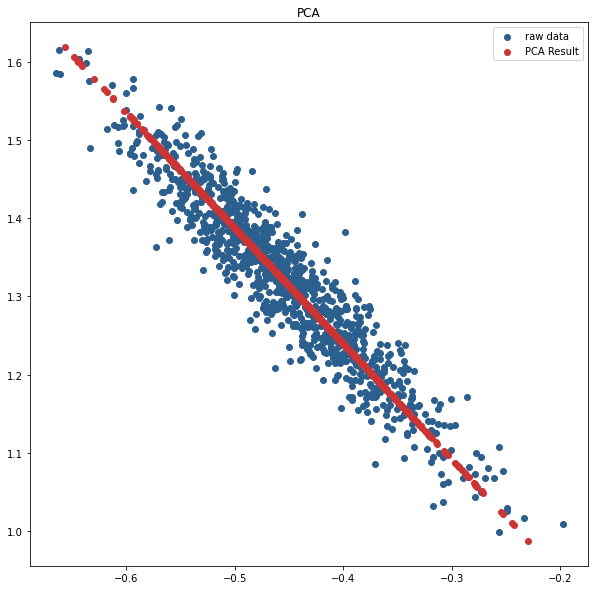

In [31]:
# pca

pca = PCA(n_components=1)
pred_x = pca.fit_transform(x_list) * pca.components_[0] + pca.mean_

plt.figure(figsize=(10, 10))
plt.title("PCA")
plt.scatter(x_list[:, 0], x_list[:, 1], c="#2b5f8e", label="raw data")
plt.scatter(pred_x[:, 0], pred_x[:, 1], c="#cc3536", label="PCA Result")
plt.legend()
plt.show()